In [26]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing dataset
data = pd.read_csv('train.csv')

In [4]:
#Printing quick data to explore data visually
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Statistical exploration

In [5]:
#statistics summary for numerical fields
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Skewness is how data is clustered together within a dataset. 
Every dataset can have some gradient of three skew states: No Skew, Positive Skew and Negative Skew.

No Skew:
Mode = Median = Mean

Positive Skew:
Mode < Median < Mean

Negative Skew:
Mode > Median > Mean

In [13]:
#look into mean median and mode of variables, eg Age
mean = data['Age'].mean()
median = data['Age'].median()
mode = data['Age'].mode()
print(mean,median,mode)

29.69911764705882 28.0 0    24.0
dtype: float64


In [20]:
#look into mean median and mode of variables, eg Fare
mean = data['Fare'].mean()
median = data['Fare'].median()
mode = data['Fare'].mode()
print(mean,median,mode)

32.2042079685746 14.4542 0    8.05
dtype: float64


In [16]:
#For Non-numeric values we can look for uniqueness to understand data
data['Sex'].unique()

array(['male', 'female'], dtype=object)

### Visualisation
Histograms

/home/harshit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/harshit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


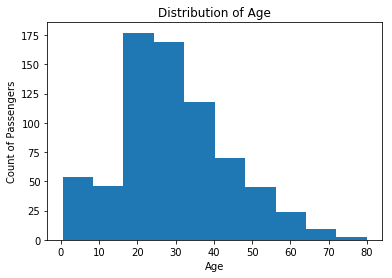

In [18]:
#Histogram of Age
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data['Age'],bins=10,range=(data['Age'].min(),data['Age'].max()))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

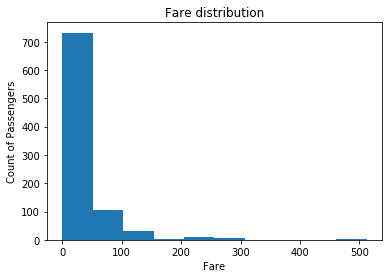

In [19]:
#Plot histogram for fare
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data['Fare'],bins=10,range=(data['Fare'].min(),data['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

Box Plots



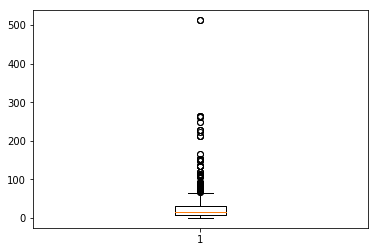

In [22]:
#Box Plot for Fare
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(data['Fare'])
plt.show()

/home/harshit/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


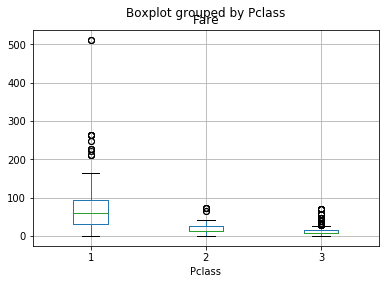

In [27]:
#looking at fare across 3 passenger classes
data.boxplot(column='Fare',by='Pclass')

### Categorical variable analysis

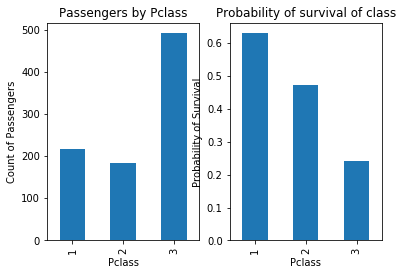

In [28]:
#population and probability of survival by PClass
temp1= data.groupby('Pclass').Survived.count()
temp2 = data.groupby('Pclass').Survived.sum()/data.groupby('Pclass').Survived.count()
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title('Passengers by Pclass')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title('Probability of survival of class')
temp2.plot(kind='bar')

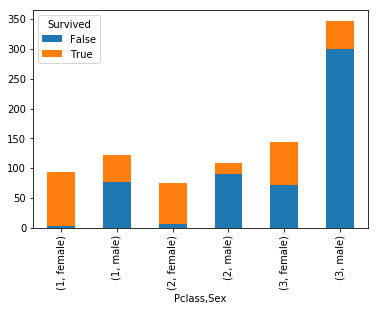

In [29]:
temp3 = pd.crosstab([data.Pclass,data.Sex],data.Survived.astype(bool))
temp3.plot(kind='bar',stacked=True)